# 12. 딥러닝 프로젝트
## 12-1. 들어가며
### 과정 개요
- Boston 주택 가격 예측 모델<br>
여러 데이터를 받아서 가격을 예측하는 프로젝트를 진행해봅니다.
- Reuters 딥러닝 모델<br>
시퀀스 데이터를 받아서 분류하는 프로젝트를 진행해봅니다.
- CIFAR10 딥러닝 모델<br>
이미지 데이터를 받아서 분류하는 프로젝트를 진행해봅니다.

### 학습 목표
- Boston Housing 데이터셋을 이용해 주택 가격을 예측하는 딥러닝 모델을 실습합나다.
- Reuters 데이터넷을 이용해 텍스트로 구성된 뉴스 데이터의 주제를 분류하는 딥러닝 모델을 실습합니다.
- CIFAR10 데이터셋을 이용해 여러 객체의 이미지를 분류하는 딥러닝 모델을 실습합니다

## 12-2. Boston 주택 가격 예측 모델
Boston 주택 가격 예측 모델에서 사용되는 데이터셋은 보스턴 시의 주택 가격 데이터셋으로, 주택의 여러 요건과 가격 정보가 포함되어 있습니다.
- 데이터셋의 feature에 대한 설명
| feature |                        설명                                  |
| ------- | ------------------------------------------------------------ |
| CRIM	  | 자치시별 1인당 범죄율                                        |
| ZN	  | 25,000 평방피트를 초과하는 거주지역의 비율                   |
| INDUS	  | 비소매상업지역이 점유하고 있는 토지의 비율                   |
| CHAS	  | 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)|
| NOX	  | 10ppm 당 농축 일산화질소                                     |
| RM	  | 주택 1 가구당 평균 방의 개수                                 |
| AGE	  | 1940년 이전에 건축된 소유주택의 비율                         |
| DIS	  | 5개의 보스턴 직업센터까지의 접근성 지수                      |
| RAD	  | 방사형 도로까지의 접근성 지수                                |
| TAX	  | 10,000 달러당 재산세율                                       |
| PTRATIO | 자치시(town)별 학생/교사 비율                                |
| B	      | $1000(Bk−0.63)^2$, 여기서Bk는 자치시별 흑인의 비율을 말함    |
| LSTAT	  | 모집단의 하위계층의 비율(%)                                  |
| MEDV	  | 본인 소유의 주택가격(중앙값)(단위: $1,000)                   |

### 데이터 로드 및 전처리
- 먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
- 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


- 데이터셋의 전처리를 위해 표준화 작업을 수행해야 합니다. 아래의 주석을 보고 코드를 작성해 보세요.

In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

# 데이터 전처리 결과 확인
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (404, 13)
Test data shape: (102, 13)


### 모델 구성 및 컴파일
주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]

# 모델 구성
model = models.Sequential([
    # 입력 데이터의 크기에 맞춘 첫 번째 Dense 레이어
    layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    # 두 번째 Dense 레이어
    layers.Dense(64, activation='relu'),
    # 출력 레이어: 주택 가격을 예측하므로 유닛이 1개이고 활성화 함수는 없음
    layers.Dense(1)
])

# 모델 요약 출력 (구성 확인용)
model.summary()

# 모델 컴파일
model.compile(optimizer='rmsprop',  # RMSProp 옵티마이저 사용
              loss='mse',           # 평균 제곱 오차(MSE) 손실 함수
              metrics=['mae'])      # 평가 지표로 평균 절대 오차(MAE) 사용

print("Model compiled successfully.")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Model compiled successfully.


### 모델 학습
epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

Epoch 1/50
21/21 [==============================] - 1s 9ms/step - loss: 495.9714 - mae: 20.2586 - val_loss: 472.8997 - val_mae: 19.7050
Epoch 2/50
21/21 [==============================] - 0s 3ms/step - loss: 342.3971 - mae: 16.2137 - val_loss: 302.7092 - val_mae: 15.0624
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 195.1046 - mae: 11.6378 - val_loss: 151.1312 - val_mae: 9.7439
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 89.9568 - mae: 7.3899 - val_loss: 77.2960 - val_mae: 6.6311
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 50.1259 - mae: 5.3794 - val_loss: 47.2232 - val_mae: 5.1138
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 33.1680 - mae: 4.1738 - val_loss: 32.0943 - val_mae: 4.2735
Epoch 7/50
21/21 [==============================] - 0s 3ms/step - loss: 25.3090 - mae: 3.4693 - val_loss: 25.1584 - val_mae: 3.7471
Epoch 8/50
21/21 [==============================] - 0s 3ms/step -

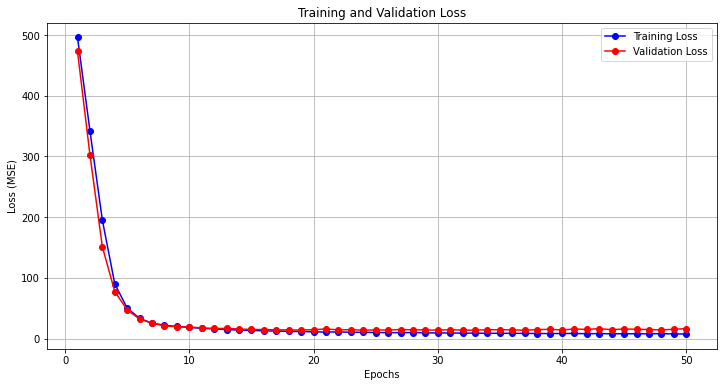

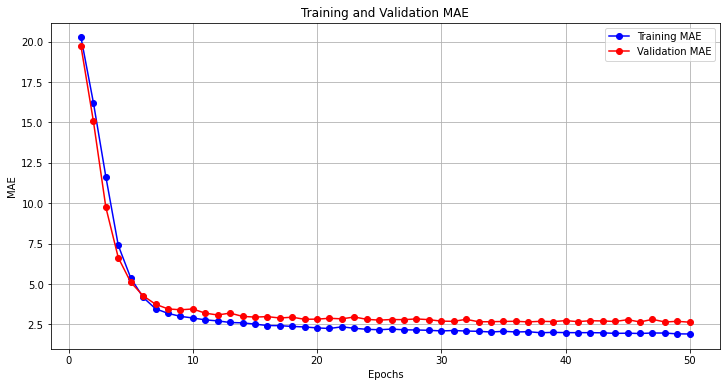

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# 모델 학습
epochs = 50  # 학습 횟수
batch_size = 16  # 배치 크기

history = model.fit(train_data, train_labels, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_split=0.2,  # 검증 데이터 비율
                    verbose=1)  # 학습 과정 출력

# 학습 결과 시각화
# 훈련 손실 및 검증 손실 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs_range, loss, 'bo-', label='Training Loss')
plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

# 훈련 MAE 및 검증 MAE 시각화
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(12, 6))
plt.plot(epochs_range, mae, 'bo-', label='Training MAE')
plt.plot(epochs_range, val_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid()
plt.show()

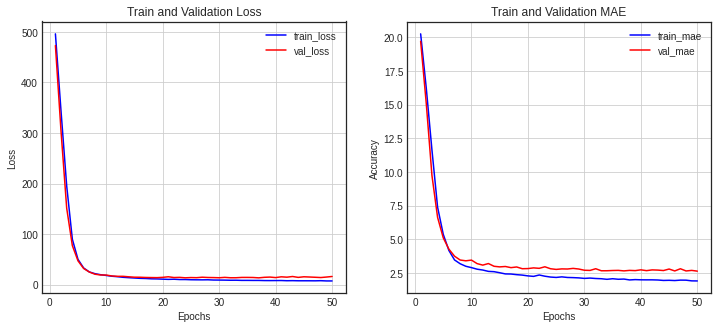

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
- 테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

Epoch 1/50
21/21 [==============================] - 0s 5ms/step - loss: 7.5121 - mae: 1.9214 - val_loss: 15.1090 - val_mae: 2.7849
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 7.3962 - mae: 1.9015 - val_loss: 15.9022 - val_mae: 2.8021
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 7.1659 - mae: 1.8716 - val_loss: 15.1955 - val_mae: 2.7013
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 7.1608 - mae: 1.8568 - val_loss: 15.1210 - val_mae: 2.5791
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 7.3880 - mae: 1.8920 - val_loss: 15.0727 - val_mae: 2.6261
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 7.1787 - mae: 1.8974 - val_loss: 15.4099 - val_mae: 2.6879
Epoch 7/50
21/21 [==============================] - 0s 3ms/step - loss: 7.1113 - mae: 1.8660 - val_loss: 16.5595 - val_mae: 2.7141
Epoch 8/50
21/21 [==============================] - 0s 4ms/step - loss: 7.0525 - ma

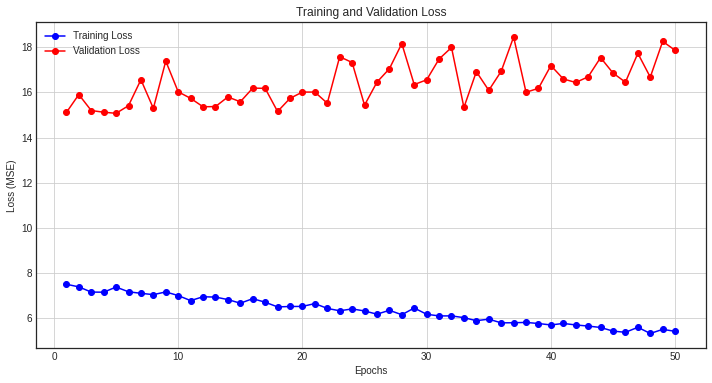

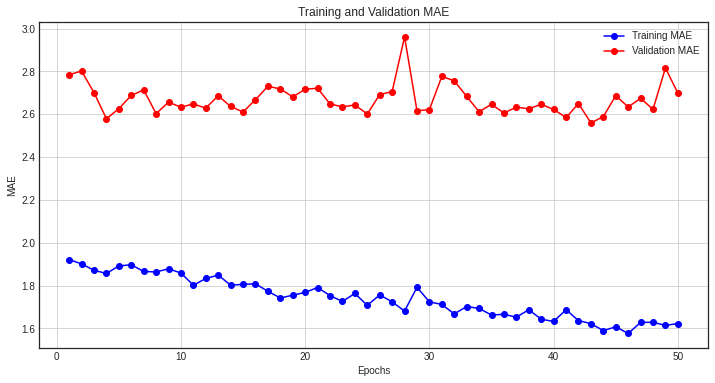

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# 모델 학습
epochs = 50  # 학습 횟수
batch_size = 16  # 배치 크기

history = model.fit(train_data, train_labels, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_split=0.2,  # 검증 데이터 비율
                    verbose=1)  # 학습 과정 출력

# 학습 결과 시각화
# 훈련 손실 및 검증 손실 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs_range, loss, 'bo-', label='Training Loss')
plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

# 훈련 MAE 및 검증 MAE 시각화
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(12, 6))
plt.plot(epochs_range, mae, 'bo-', label='Training MAE')
plt.plot(epochs_range, val_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid()
plt.show()

## 12-3. Reuters 딥러닝 모델
이번 스텝에서는 8번 노드에 나왔던 모델과 동일한 모델을 실습합니다. 하지만 다양한 성능 향상 방법을 사용하여 8번 노드에서의 딥러닝 모델보다 성능을 더 높일 수 있습니다. 8번 노드에서 사용했던 ReLU와는 다른 활성화함수를 사용해보고, BatchNormalization과 Dropout을 적용해 봅시다. ModelCheckpoint와 EarlyStopping 콜백 함수도 적용해 보세요.

### 데이터 설명
- 로이터 뉴스 기사 데이터셋
- 8,982개의 훈련 데이터셋, 2,246개 테스트 데이터셋
- 뉴스 기사의 주제로 46개 레이블

### 데이터 전처리
- 텍스트 데이터를 벡터로 전환
- 원핫 인코딩으로 텍스트를 0과 1의 벡터로 변환
- 뉴스 주제인 레이블도 원 핫 인코딩(범주형 인코딩)을 이용해 변환 수행

**[실습]**
### 데이터 로드 및 전처리
- reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [9]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
# Reuters 데이터셋 로드
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터에서 25%를 검증 데이터로 분리
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=42
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


- 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다. 원-핫 인코딩 함수를 직접 만들어보세요.
- 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [10]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  # [[YOUR CODE]]
    results = np.zeros((len(data), dim))  # 모든 데이터를 담을 빈 배열 생성
    for i, sequence in enumerate(data):
        results[i, sequence] = 1  # 각 sequence에서 단어 인덱스를 1로 설정
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

### 모델 구성 및 컴파일
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

In [11]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
# 모델 구성
model = models.Sequential()

# 입력 레이어 및 첫 번째 은닉층
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())  # BatchNormalization 적용
model.add(layers.Dropout(0.5))          # Dropout 적용

# 두 번째 은닉층
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())  # BatchNormalization 적용
model.add(layers.Dropout(0.5))          # Dropout 적용

# 출력층
model.add(layers.Dense(46, activation='softmax'))  # 46개의 뉴스 주제 분류

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640064    
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 46)               

### 모델 학습
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [13]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 콜백 설정
checkpoint_cb = ModelCheckpoint(
    'best_model.h5',             # 모델을 저장할 파일명
    save_best_only=True,         # 가장 성능이 좋은 모델만 저장
    monitor='val_loss',          # 검증 손실을 기준으로 체크
    mode='min',                  # 손실이 최소일 때 저장
    verbose=1
)

early_stopping_cb = EarlyStopping(
    monitor='val_loss',          # 검증 손실을 기준으로 학습 중단
    patience=5,                  # 성능 개선이 없을 경우 5 에포크 이후 종료
    mode='min',                  # 손실이 최소일 때 기준
    verbose=1
)

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=50,                   # 최대 50 에포크
    batch_size=512,              # 배치 크기
    validation_data=(x_val, y_val),  # 검증 데이터
    callbacks=[checkpoint_cb, early_stopping_cb]  # 콜백 함수 리스트
)

# 학습 결과 요약 출력
print("모델 학습 완료")


Epoch 1/50
14/14 [==============================] - 2s 74ms/step - loss: 3.7899 - accuracy: 0.1522 - val_loss: 3.5966 - val_accuracy: 0.5361

Epoch 00001: val_loss improved from inf to 3.59659, saving model to best_model.h5
Epoch 2/50
14/14 [==============================] - 0s 21ms/step - loss: 2.5638 - accuracy: 0.4544 - val_loss: 3.3005 - val_accuracy: 0.6300

Epoch 00002: val_loss improved from 3.59659 to 3.30053, saving model to best_model.h5
Epoch 3/50
14/14 [==============================] - 0s 16ms/step - loss: 1.9946 - accuracy: 0.5845 - val_loss: 3.0065 - val_accuracy: 0.6834

Epoch 00003: val_loss improved from 3.30053 to 3.00645, saving model to best_model.h5
Epoch 4/50
14/14 [==============================] - 0s 16ms/step - loss: 1.6674 - accuracy: 0.6548 - val_loss: 2.7516 - val_accuracy: 0.7070

Epoch 00004: val_loss improved from 3.00645 to 2.75156, saving model to best_model.h5
Epoch 5/50
14/14 [==============================] - 0s 14ms/step - loss: 1.4445 - accuracy: 

- 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

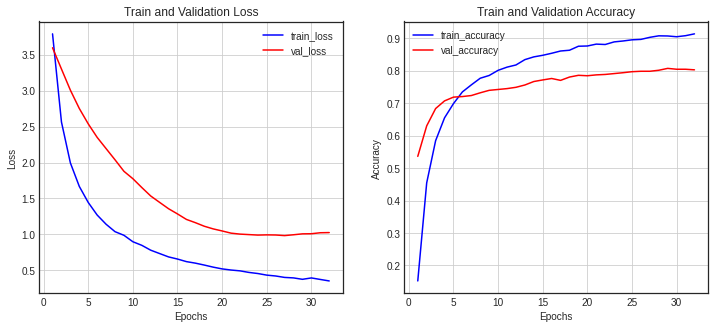

In [14]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [15]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
# 저장된 최상의 모델 불러오기
from tensorflow.keras.models import load_model
# 가장 성능이 좋았던 모델 로드
best_model = load_model('best_model.h5')

# 테스트 데이터셋 평가
test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=0)

# 평가 결과 출력
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 1.0610
Test Accuracy: 0.7783


## 12-4. CIFAR10 딥러닝 모델
CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있습니다. 데이터셋의 각 이미지는 10개의 클래스로 라벨링되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있습니다.

### 데이터 로드 및 전처리
- CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. - 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [17]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
# CIFAR10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# CIFAR10 데이터셋 정규화 (픽셀 값을 0~1 범위로 스케일링)
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 훈련 데이터에서 20%를 검증 데이터로 분리
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


- class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [18]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

- 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

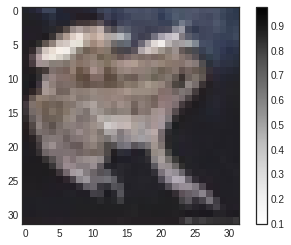

In [19]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [20]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


- 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [21]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
# 훈련, 검증, 테스트 데이터의 형태 출력
print("Original shapes:")
print("Train data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Test data shape:", x_test.shape)

# 데이터의 형태를 32 * 32 * 3 = 3072로 변형
x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

Original shapes:
Train data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
(40000, 3072)
(10000, 3072)
(10000, 3072)


In [22]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

### 모델 구성 및 컴파일
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [23]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
# 모델 구성
model = models.Sequential([
    # 입력층
    layers.Dense(512, activation='relu', input_shape=(3072,)),
    layers.BatchNormalization(),  # 배치 정규화
    layers.Dropout(0.5),          # 드롭아웃

    # 은닉층
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # 출력층
    layers.Dense(10, activation='softmax')  # CIFAR10은 10개의 클래스
])

# 모델 컴파일
model.compile(
    optimizer='adam',               # Adam 옵티마이저
    loss='sparse_categorical_crossentropy',  # 다중 클래스 분류를 위한 손실 함수
    metrics=['accuracy']            # 평가 지표: 정확도
)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

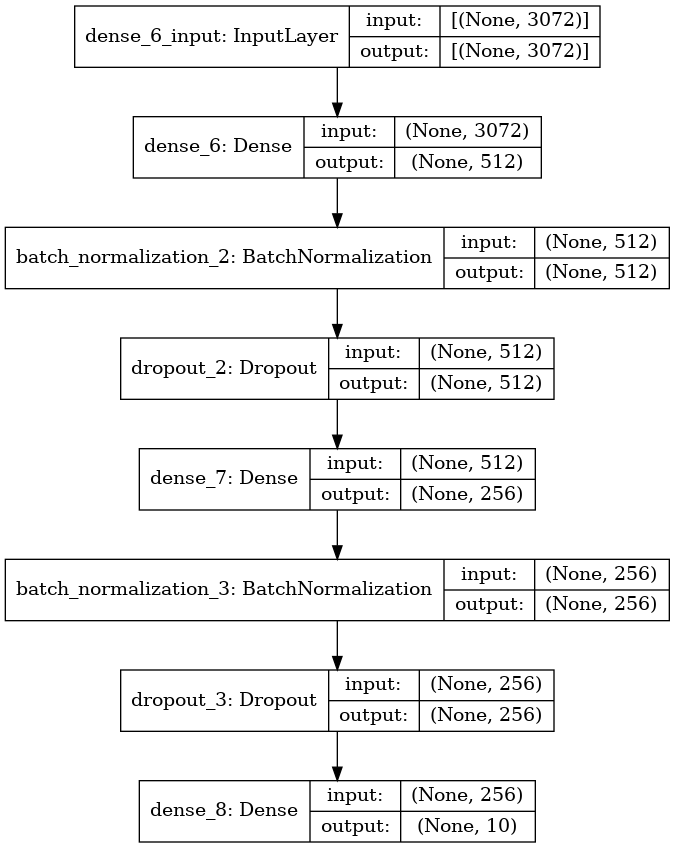

In [25]:
utils.plot_model(model, show_shapes=True)

### 모델 학습
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [26]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
# 콜백 함수 설정
checkpoint = ModelCheckpoint(
    'best_cifar10_model.h5',  # 최적 모델 저장 경로
    monitor='val_loss',       # 검증 손실 기준으로 저장
    save_best_only=True,      # 가장 성능이 좋은 모델만 저장
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',       # 검증 손실 기준으로 학습 중단
    patience=10,              # 성능 향상이 없으면 10번의 에포크 후 중단
    verbose=1
)

# 모델 학습
history = model.fit(
    x_train, y_train,                     # 훈련 데이터
    epochs=50,                            # 최대 에포크 수
    batch_size=128,                       # 배치 크기
    validation_data=(x_val, y_val),       # 검증 데이터
    callbacks=[checkpoint, early_stopping]  # 콜백 적용
)

Epoch 1/50
313/313 [==============================] - 4s 7ms/step - loss: 2.2203 - accuracy: 0.2792 - val_loss: 2.2461 - val_accuracy: 0.1126

Epoch 00001: val_loss improved from inf to 2.24610, saving model to best_cifar10_model.h5
Epoch 2/50
313/313 [==============================] - 2s 6ms/step - loss: 1.8261 - accuracy: 0.3523 - val_loss: 1.8242 - val_accuracy: 0.3737

Epoch 00002: val_loss improved from 2.24610 to 1.82423, saving model to best_cifar10_model.h5
Epoch 3/50
313/313 [==============================] - 2s 6ms/step - loss: 1.7326 - accuracy: 0.3837 - val_loss: 1.6425 - val_accuracy: 0.4194

Epoch 00003: val_loss improved from 1.82423 to 1.64248, saving model to best_cifar10_model.h5
Epoch 4/50
313/313 [==============================] - 2s 6ms/step - loss: 1.6903 - accuracy: 0.4026 - val_loss: 1.6331 - val_accuracy: 0.4183

Epoch 00004: val_loss improved from 1.64248 to 1.63306, saving model to best_cifar10_model.h5
Epoch 5/50
313/313 [==============================] - 2s

- 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

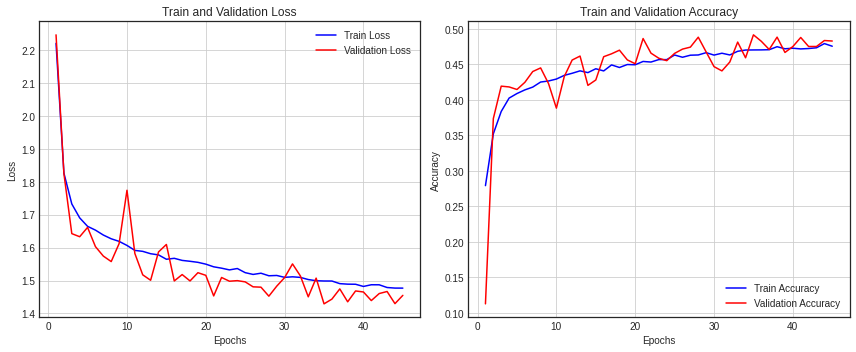

In [27]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]
# 학습 히스토리 데이터
history_dict = history.history

# 손실 함수 및 정확도 값
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# 에포크 수
epochs = range(1, len(loss) + 1)

# 시각화 스타일
plt.style.use('seaborn-white')

# 그래프 크기 설정
fig = plt.figure(figsize=(12, 5))

# 손실 함수 시각화
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='Train Loss')
ax1.plot(epochs, val_loss, 'r-', label='Validation Loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

# 정확도 시각화
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='Train Accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid(True)
ax2.legend()

# 차트 출력
plt.tight_layout()
plt.show()

### 모델 평가 및 예측
- 테스트 데이터셋을 이용해 모델을 평가합니다

In [28]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4592 - accuracy: 0.4761


[1.4591718912124634, 0.47609999775886536]

사실 지금까지 배운 Dense Layer만 활용해서는 이번 프로젝트에서 높은 accuracy를 얻기는 힘듭니다. 이미지 데이터를 다루기 위해서는 이미지에 적합한 CNN(Convolution Neural Network) 계열의 모델을 사용해야 합니다. CNN에 대한 내용은 Computer Vision 과정을 통해 더 배울 수 있습니다.